### **Data Cleaning**

#### **Import libraries**

In [54]:
import pandas as pd
import numpy as np

from pathlib import Path

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

# encoding module
import chardet

import fuzzywuzzy
from fuzzywuzzy import process

c:\Users\Lucia\anaconda3\envs\github_env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
np.random.seed(0)

In [ ]:
data_dir = Path("nflplaybyplay2009to2016/")

#### **Handling missing values**

Missing data can be caused by two different phenomena:
- Data wasn't recorded. In this case, it is meaningful to understand what values to add.
- Data doesn't exist. It's better to remove NaN since we have no idea how to handle missing data.

In [6]:
nfl_data = pd.read_csv(data_dir / "NFL Play by Play 2009-2017 (v4).csv")

C:\Users\Lucia\AppData\Local\Temp/ipykernel_2112/2665981890.py:3: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv(data_dir / "NFL Play by Play 2009-2017 (v4).csv")


In [7]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [8]:
nfl_data.shape

(407688, 102)

In [12]:
# counting missing values.

missing_values_count = nfl_data.isna().sum()
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [14]:
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

total_missing / total_cells

0.2487214126835169

In [16]:
#--- Dropna.

nfl_data.dropna(axis = 0)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [15]:
nfl_data.dropna(axis = 1)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,1,0,-4,1,0,0,...,1,BAL,0,3,0,2,0,0.0,0.0,2017
407684,2017-12-31,2017123101,29,4,1,14,-4,1,0,0,...,0,None,2,2,0,2,0,0.0,0.0,2017
407685,2017-12-31,2017123101,29,4,1,14,9,1,13,0,...,0,None,2,2,0,2,0,0.0,0.0,2017
407686,2017-12-31,2017123101,30,4,1,10,-1,1,-1,0,...,0,None,0,2,0,2,0,0.0,0.0,2017


In [ ]:
#--- Replace NaNs with other values. 

# bfill is usefuk when data are sorted in a specific order. 
nfl_data.fillna(method='bfill', axis = 0).fillna(0)

#### **Scaling and normalization**

_Scaling_ refers to the range of values in data, while normalization works on the distribution of data.

_Scaling_ is useful when different variables at different scales should be compared, especially when the model exploits some distances, such as KNN or SVM.
For example, Yen and dollars can be compared only after a scaling process because a difference of 1 Yen isn't as important as a difference of 1 Dollar. Clearly, the distribution of data doesn't change.

_Normalization_ force the ditribution of data to be normal. It is useful whenerver you want to use a model which assumes the normality hypothesis, such as LDA or Naive Bayes. 

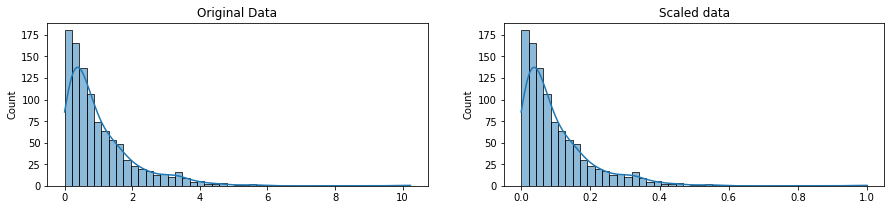

In [24]:
# Generate fake data.
original_data = np.random.exponential(size = 1000)

# Scale data.
scaled_data = minmax_scaling(original_data, columns = [0])

# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()


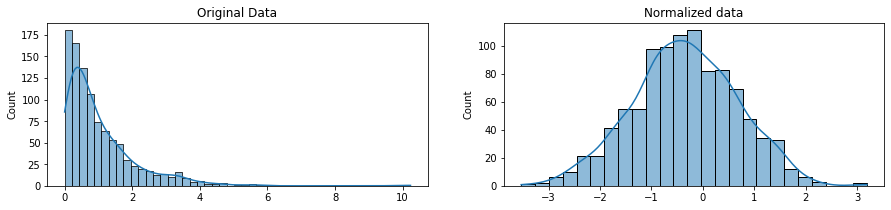

In [25]:
# Normalize data with normal distribution.
normalized_data = stats.boxcox(original_data)

# Plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

#### **Parsing dates**

In [28]:
data_dir = Path('landslide-events')

landslides = pd.read_csv(data_dir / "catalog.csv")

In [29]:
landslides.shape

(1693, 23)

In [30]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [32]:
# The type is object, which most often is a string. 

landslides.date[:5]

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [36]:
landslides.date_parsed = pd.to_datetime(landslides.date, format = "%m/%d/%y") 
landslides.date_parsed.head(5)

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [38]:
landslides.date_parsed.dt.day.head(5)

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date, dtype: float64

#### **Character encodings**

Character encodings are specific sets of rules that maps the raw binary code into human-readable text.

If you encode some text with a different encoder than the one it was originally written in, mojibake or unkown characters can be ended up. 

The most common is UTF-8 which is the standard, especially for Python. ASCII is an old standard. 

Moreover, Python save csv files in utf-8 format. 

In [43]:
# String

before = "This is the euro symbol: €"

type(before)

str

In [45]:
# Convert the string in bytes

after = before.encode("utf-8", errors = "replace")

type(after), after

(bytes, b'This is the euro symbol: \xe2\x82\xac')

In [47]:
# you can't use another encoder.

# print(after.decode("ascii"))

In [51]:
data_dir = Path('kickstarter-projects')

# It is not so easy to find the correct encoder. 
# Look at the first ten thousand bytes to guess the character encoding
with open(data_dir / "ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [53]:
kickstarter_2016 = pd.read_csv(data_dir / "ks-projects-201612.csv", encoding = 'Windows-1252')
kickstarter_2016.head(5)

C:\Users\Lucia\AppData\Local\Temp/ipykernel_2112/4283516346.py:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv(data_dir / "ks-projects-201612.csv", encoding = 'Windows-1252')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


#### **Inconsistent data entry**

In [64]:
data_dir = Path('pakistan-intellectual-capital')

professors = pd.read_csv(data_dir / "pakistan_intellectual_capital.csv")

In [67]:
countries = professors['Country'].unique()

np.sort(countries)

array(['Australia', 'Austria', 'Canada', 'China', 'Finland', 'France',
       'Germany', 'Greece', 'HongKong', 'Ireland', 'Italy', 'Japan',
       'Macau', 'Malaysia', 'Mauritius', 'Netherland', 'New Zealand',
       'Norway', 'Pakistan', 'Portugal', 'Russian Federation',
       'Saudi Arabia', 'Scotland', 'Singapore', 'South Korea',
       'SouthKorea', 'Spain', 'Sweden', 'Thailand', 'Turkey', 'UK', 'USA',
       'USofA', 'Urbana', 'germany'], dtype=object)

In [66]:
# in order to standardize

# professors['Country'] = professors['Country'].str.lower()
professors['Country'] = professors['Country'].str.strip()

In [63]:
countries = professors['Country'].unique()

np.sort(countries)

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [60]:
#  Fuzzy matching are used to find how close two words are.

matches = fuzzywuzzy.process.extract("south corea", countries, limit = 10, scorer = fuzzywuzzy.fuzz.token_sort_ratio)

matches

[('south korea', 91),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('macau', 38),
 ('norway', 35),
 ('ireland', 33),
 ('pakistan', 32),
 ('portugal', 32),
 ('scotland', 32),
 ('singapore', 30)]

In [61]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [62]:
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")

All done!
